# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore
from tqdm import tqdm

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from lifelines.utils import concordance_index
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [8]:
data = pd.read_csv("data.csv")
data

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
0,2024,AGRICULTURE,ACCOUNTANT,"OTTO, BRIDGET",55819.64
1,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"STOEHR, KALEB J.",59947.10
2,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"WALKER, JOE E.",8010.72
3,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"BROWN, LISA RENEE",13880.70
4,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"EVANS, MICHELLE R.",10455.10
...,...,...,...,...,...
72863,2024,TRANSPORTATION,TRANSPORTATION PROJECT MGR,"WOOLSEY, CURT D",94387.00
72864,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"BRELSFORD, SCOTT L",38791.20
72865,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"DOTSON, JOSEPH L",74517.01
72866,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"HENSON, JAMES DUSTIN",83122.81


In [9]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72868 entries, 0 to 72867
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Calendar Year   72868 non-null  int64  
 1   Agency Name     72868 non-null  object 
 2   Position Title  72868 non-null  object 
 3   Employee Name   72868 non-null  object 
 4   YTD Gross Pay   72868 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
data.shape[0]

72868

In [10]:
# Buang fitur yang tidak digunakan 
data.drop(columns=['Employee Name', 'Calendar Year'], inplace=True)

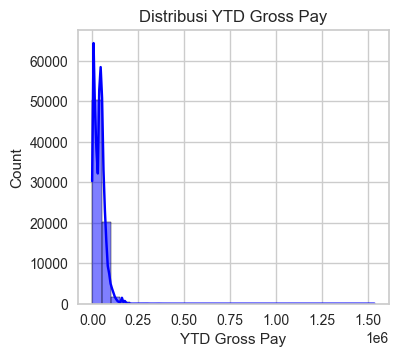

In [11]:
# EDA untuk Distribusi data numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Plotting:   0%|          | 0/2 [00:00<?, ?it/s]

Plotting: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


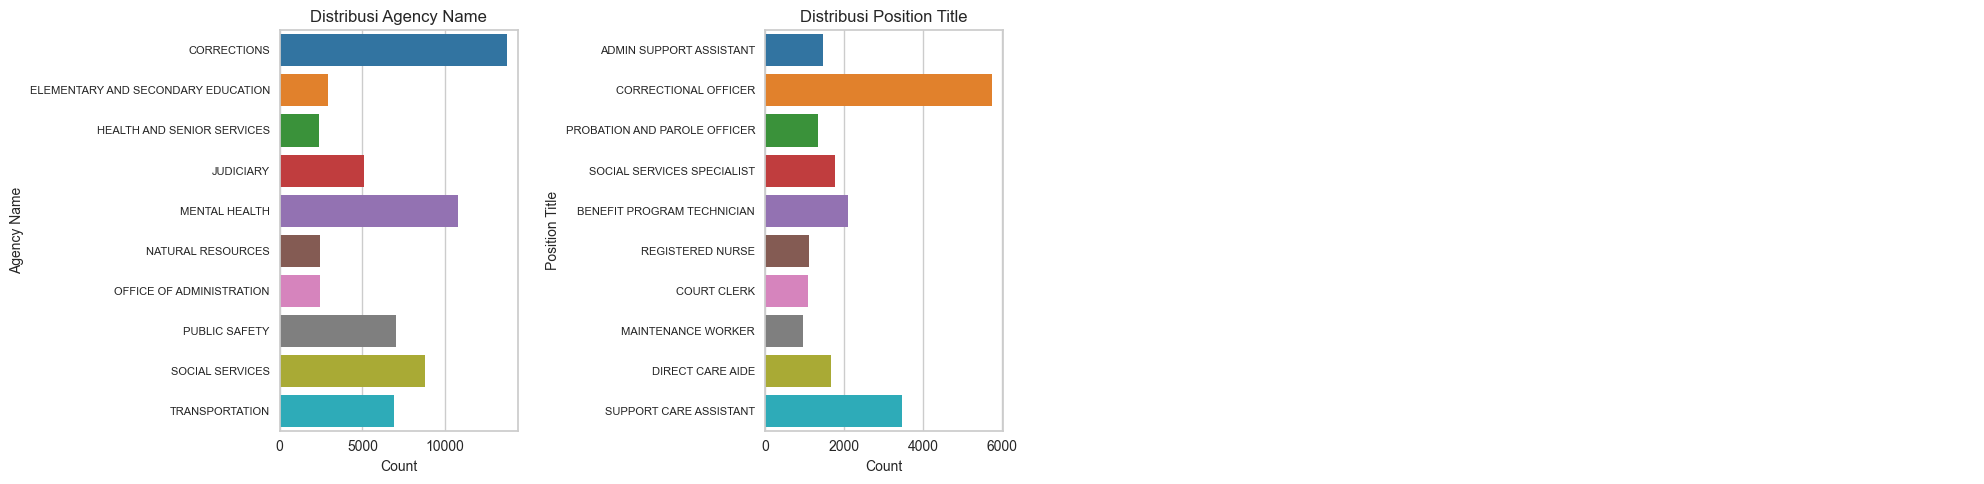

In [13]:
# EDA untuk Distribusi data kategorik
cat_features = data.select_dtypes(include=[object])
num_features = len(cat_features.columns)

rows = math.ceil(num_features / 4) 
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()  

for i, column in tqdm(enumerate(cat_features.columns), total=num_features, desc="Plotting"):
    top_categories = data[column].value_counts().nlargest(10).index
    filtered_data = data[data[column].isin(top_categories)]
    sns.countplot(y=filtered_data[column], hue=filtered_data[column], ax=axes[i], palette='tab10', legend=False)
    axes[i].set_title(f'Distribusi {column}', fontsize=12)
    axes[i].set_xlabel('Count', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    
    plt.setp(axes[i].get_yticklabels(), fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

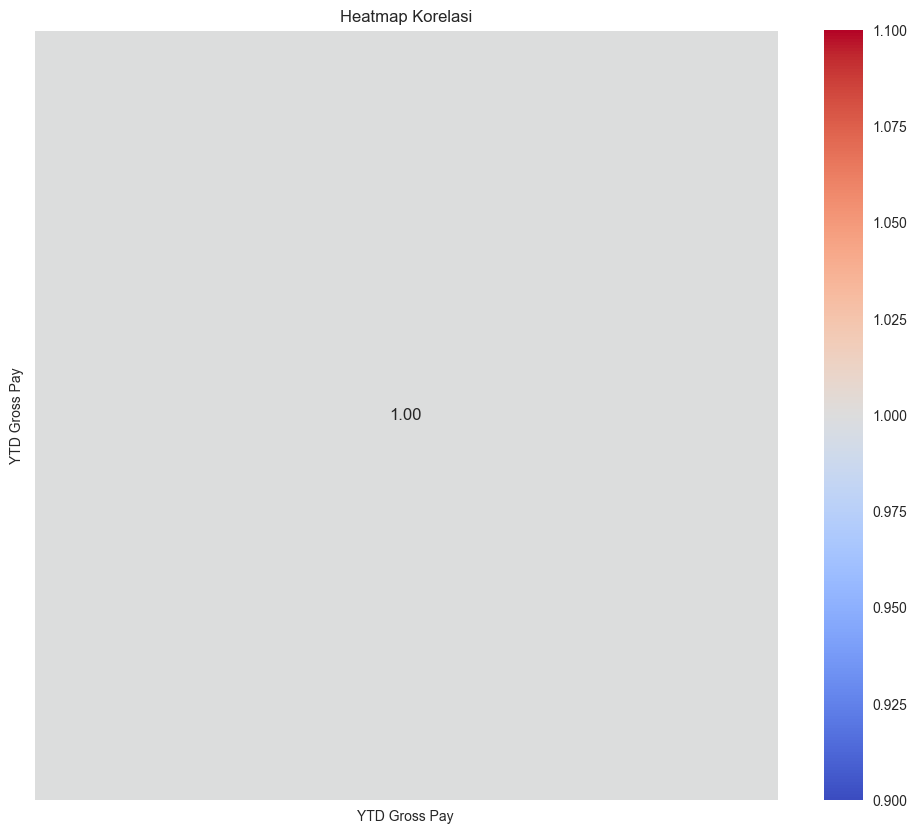

In [15]:
# Heatmap korelasi untuk fitur numerik
num_features = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()  # Hitung korelasi pada DataFrame numerik
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [16]:
# Cek apakah ada data yang kosong
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Agency Name       0
Position Title    0
YTD Gross Pay     0
dtype: int64


In [17]:
data.head()

,Agency Name,Position Title,YTD Gross Pay
0,AGRICULTURE,ACCOUNTANT,55819.64
1,AGRICULTURE,ACCOUNTS SUPERVISOR,59947.10
2,AGRICULTURE,ACCOUNTS SUPERVISOR,8010.72
3,AGRICULTURE,ADMIN SUPPORT ASSISTANT,13880.70
4,AGRICULTURE,ADMIN SUPPORT ASSISTANT,10455.10


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [8]:
# Karena data yang kosong hanya 39,992% dari data maka kita akan isi data yang kosong dengan nilai yang paling banyak keluar
for column in data.columns:
    most_frequent_value = data[column].mode()[0]  
    data[column] = data[column].fillna(most_frequent_value)

In [18]:
# Cek apakah data kita terdapat outliers atau tidak
numerical_data = data.select_dtypes(include=[np.number])
z_scores = numerical_data.apply(zscore)

for col in z_scores.columns:
    outliers = data[z_scores[col].abs() > 3]
    print(f"Outliers di kolom '{col}':")
    print(outliers if not outliers.empty else "Tidak ada outliers")

Outliers di kolom 'YTD Gross Pay':
                  Agency Name               Position Title  YTD Gross Pay
190               AGRICULTURE   DEPUTY STATE DEPT DIRECTOR      144118.60
1347              AGRICULTURE    STATE DEPARTMENT DIRECTOR      163372.87
1369   COMMERCE AND INSURANCE                      ACTUARY      177707.04
1370   COMMERCE AND INSURANCE                      ACTUARY      185203.31
1371   COMMERCE AND INSURANCE                      ACTUARY      146930.28
...                       ...                          ...            ...
72264          TRANSPORTATION    SR FABRICATION TECHNICIAN      143881.61
72578          TRANSPORTATION        STATE BRIDGE ENGINEER      133920.42
72579          TRANSPORTATION       STATE CO & MA ENGINEER      133920.42
72580          TRANSPORTATION        STATE DESIGN ENGINEER      133920.42
72811          TRANSPORTATION  TRANSPORTATION PLANNING DIR      133920.42

[803 rows x 3 columns]


In [20]:
# Menghapus Outlier 
data_numerik = data.select_dtypes(include=['int64', 'float64'])
Q1 = data_numerik.quantile(0.25)
Q3 = data_numerik.quantile(0.75)
IQR = Q3 - Q1

condition = ~((data_numerik < (Q1 - 1.5 * IQR)) | (data_numerik > (Q3 + 1.5 * IQR))).any(axis=1)
data = data.loc[condition, data.columns]

In [21]:
data

,Agency Name,Position Title,YTD Gross Pay
0,AGRICULTURE,ACCOUNTANT,55819.64
1,AGRICULTURE,ACCOUNTS SUPERVISOR,59947.10
2,AGRICULTURE,ACCOUNTS SUPERVISOR,8010.72
3,AGRICULTURE,ADMIN SUPPORT ASSISTANT,13880.70
4,AGRICULTURE,ADMIN SUPPORT ASSISTANT,10455.10
...,...,...,...
72863,TRANSPORTATION,TRANSPORTATION PROJECT MGR,94387.00
72864,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,38791.20
72865,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,74517.01
72866,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,83122.81


In [ ]:
# Pemakaian Feature dan standarisasi serta encoding data kategorik
numerical_features = data[['YTD Gross Pay']]
# categorical_feature = data[['Agency Name', 'Position Title']]

# Standarisasi fitur numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Standarisasi fitur kategorik
encoded_agency = encoder.fit_transform(data['Agency Name'])
encoded_position = encoder.fit_transform(data['Position Title'])
encoded_categorical = np.column_stack([encoded_agency, encoded_position])

# Final features 
final_features = np.concatenate([scaled_features, encoded_categorical], axis=1)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(final_features)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 2
numerical_features = data[['YTD Gross Pay']]
categorical_feature = data[['Agency Name', 'Position Title']]
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(final_features, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_indices = labels == cluster_id
        cluster_data = final_features[cluster_indices]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_YTD = cluster_data[:, 0].mean()
        mean_agency = cluster_data[:, 1].mean()
        mean_position = cluster_data[:, 2].mean()
        mean_heart_rate_status = cluster_data[:, 1].mean()
        # mean_cholesterol = cluster_data[:, 1].mean()
        # mean_bmi = cluster_data[:, 2].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Penghasilan : {mean_YTD:.2f}")
        print(f"Rata-rata Agency : {mean_agency:.2f}")
        print(f"Rata-rata Posisi Pekerjaan : {mean_position:.2f}")
        # print(f"Rata-rata BMI : {mean_bmi:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(final_features, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Penghasilan : -0.11
Rata-rata Agency : 10.84
Rata-rata Posisi Pekerjaan : 453.61

Cluster 2:
Rata-rata Penghasilan : 0.10
Rata-rata Agency : 13.77
Rata-rata Posisi Pekerjaan : 1704.57


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

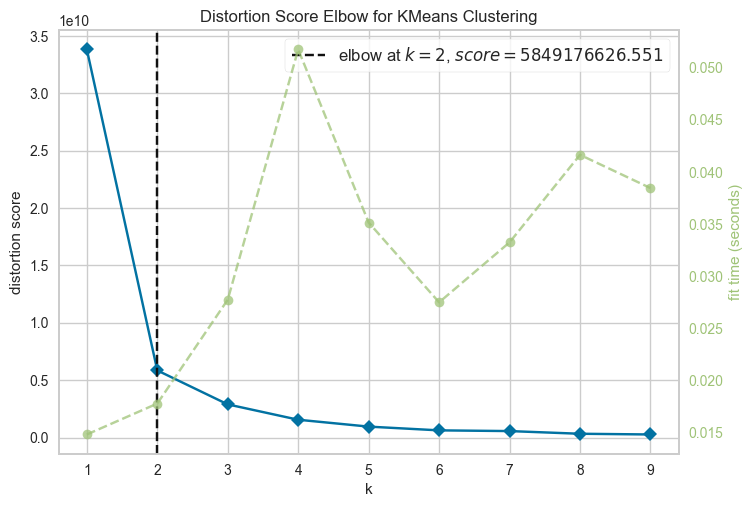

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Menggunakan algoritma KMEANS untuk memprediksi hubungan tekanan darah dan konsumsi alkohol dengan diabetes
kmeans = KMeans()
 
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
visualizer.fit(final_features)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [26]:
k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(final_features)
score = silhouette_score(final_features, labels)
print(f'k={k}, Silhouette Score={score}')

k=2, Silhouette Score=0.7146696149793241


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

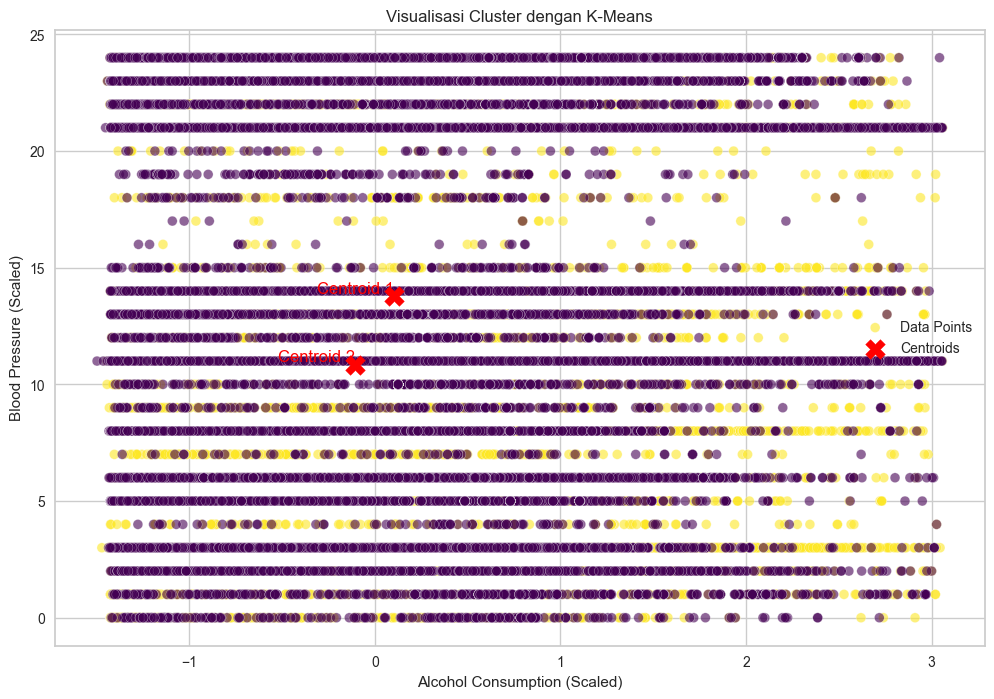

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(final_features)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(final_features[:, 0], final_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

plt.xlabel('Alcohol Consumption (Scaled)')
plt.ylabel('Blood Pressure (Scaled)')

plt.title('Visualisasi Cluster dengan K-Means')

plt.legend()

plt.show()

In [32]:
print(data.columns)

Index(['Agency Name', 'Position Title', 'YTD Gross Pay', 'Cluster'], dtype='object')


In [31]:
data.select_dtypes(include=["object"]).columns

Index(['Agency Name', 'Position Title'], dtype='object')

Analisis Cluster:   0%|          | 0/2 [00:00<?, ?it/s]


Statistik Deskriptif Cluster 1


,YTD Gross Pay,Cluster
count,34950.000000,34950.0
mean,33368.975471,1.0
std,25449.782761,0.0
min,-1180.910000,1.0
25%,10443.805000,1.0
50%,33103.595000,1.0
75%,50362.340000,1.0
max,113566.290000,1.0



Persentase Data Kategorikal Cluster 1


Agency Name
CORRECTIONS                           0.294478
SOCIAL SERVICES                       0.122318
MENTAL HEALTH                         0.096767
PUBLIC SAFETY                         0.089728
JUDICIARY                             0.077196
TRANSPORTATION                        0.051187
CONSERVATION                          0.035823
ELEMENTARY AND SECONDARY EDUCATION    0.032504
AGRICULTURE                           0.030873
NATURAL RESOURCES                     0.030014
OFFICE OF ADMINISTRATION              0.029413
REVENUE                               0.029213
LABOR AND INDUSTRIAL RELATIONS        0.014249
COMMERCE AND INSURANCE                0.013906
HEALTH AND SENIOR SERVICES            0.013190
NATIONAL GUARD                        0.009299
HIGHER EDUCATION AND WORKFORCE DEV    0.008927
OFFICE OF ATTORNEY GENERAL            0.006094
OFFICE OF SECRETARY OF STATE          0.004378
LEGISLATURE                           0.004320
ECONOMIC DEVELOPMENT                  0.003348
O

Position Title
CORRECTIONAL OFFICER             0.163920
BENEFIT PROGRAM TECHNICIAN       0.060086
DIRECT CARE AIDE                 0.048069
ADMIN SUPPORT ASSISTANT          0.042260
COURT CLERK                      0.031302
                                   ...   
ASSISTANT DEPUTY                 0.000029
IMAGING SERVICES MANAGER         0.000029
GRANTS & ELECTIONS SPECIALIST    0.000029
EDITOR IN CHIEF                  0.000029
COMMISSIONER                     0.000029
Name: proportion, Length: 1080, dtype: float64


Statistik Deskriptif Cluster 0


,YTD Gross Pay,Cluster
count,36557.000000,36557.0
mean,38686.201927,0.0
std,24943.543569,0.0
min,-1834.880000,0.0
25%,16256.380000,0.0
50%,40922.030000,0.0
75%,54392.810000,0.0
max,113530.930000,0.0



Persentase Data Kategorikal Cluster 0


Agency Name
MENTAL HEALTH                         0.196488
TRANSPORTATION                        0.137429
SOCIAL SERVICES                       0.122330
PUBLIC SAFETY                         0.101075
CORRECTIONS                           0.092896
JUDICIARY                             0.053615
HEALTH AND SENIOR SERVICES            0.052657
ELEMENTARY AND SECONDARY EDUCATION    0.048144
OFFICE OF ADMINISTRATION              0.038105
NATURAL RESOURCES                     0.037530
CONSERVATION                          0.030747
REVENUE                               0.020188
LEGISLATURE                           0.014279
COMMERCE AND INSURANCE                0.013568
NATIONAL GUARD                        0.009820
AGRICULTURE                           0.007386
LABOR AND INDUSTRIAL RELATIONS        0.005936
OFFICE OF ATTORNEY GENERAL            0.005033
OFFICE OF STATE AUDITOR               0.003884
OFFICE OF SECRETARY OF STATE          0.002954
ECONOMIC DEVELOPMENT                  0.002325
H

Position Title
SUPPORT CARE ASSISTANT          0.094838
SOCIAL SERVICES SPECIALIST      0.048253
PROBATION AND PAROLE OFFICER    0.036628
REGISTERED NURSE                0.028476
MAINTENANCE WORKER              0.026424
                                  ...   
WILDLIFE MGMT COORDINATOR       0.000027
JUVENILE OFFICER VI             0.000027
PROBATION & PAROLE ASST I       0.000027
STATE DEPARTMENT DIRECTOR       0.000027
SCALE MAINT WORKER              0.000027
Name: proportion, Length: 1109, dtype: float64

Analisis Cluster: 100%|██████████| 2/2 [00:00<00:00, 41.06it/s]


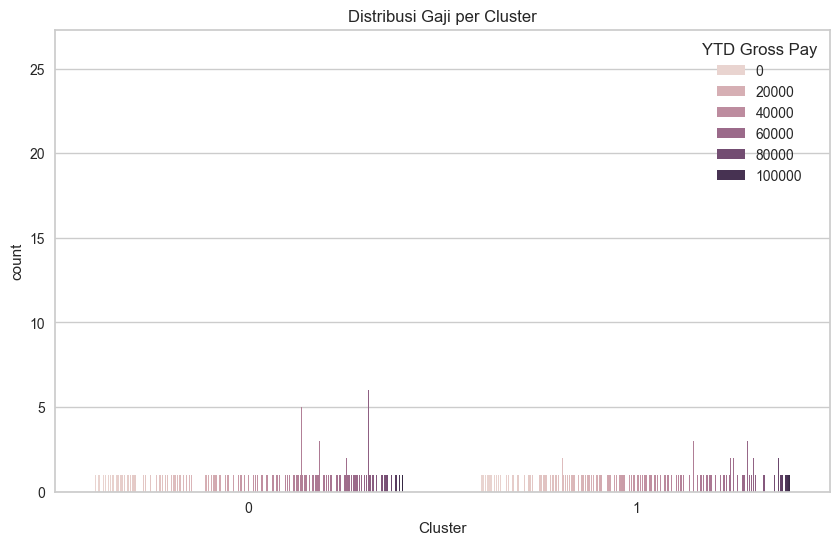

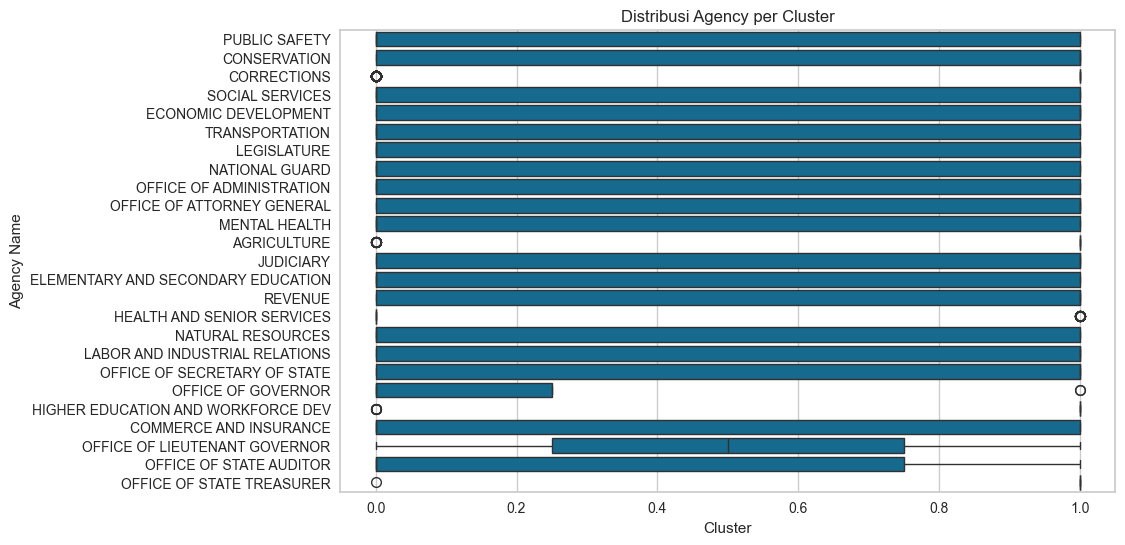

C:\Users\windows\AppData\Local\Temp\ipykernel_20288\2891160031.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Position Title', data=filtered_data, order=top_positions, palette='viridis')


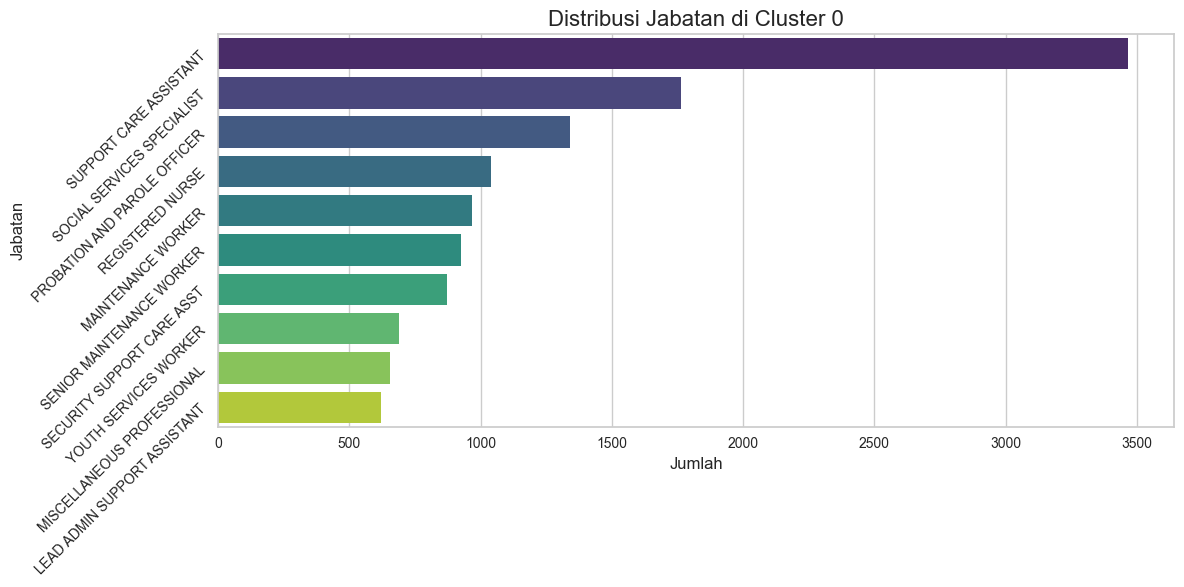

In [36]:
for cluster_id in tqdm(data['Cluster'].unique(), desc="Analisis Cluster"):
    cluster_data = data[data['Cluster'] == cluster_id]  # Simpan data cluster dalam variabel sementara
    
    print(f"\nStatistik Deskriptif Cluster {cluster_id}")
    display(cluster_data.describe())

    print(f"\nPersentase Data Kategorikal Cluster {cluster_id}")
    display(cluster_data['Agency Name'].value_counts(normalize=True))
    display(cluster_data['Position Title'].value_counts(normalize=True))

# Visualisasi Distribusi Gaji per Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='YTD Gross Pay', data=data.sample(frac=0.1))  # Sampling 10% data
plt.title('Distribusi Gaji per Cluster')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Agency Name', data=data.sample(frac=0.1))  # Sampling 10% data
plt.title('Distribusi Agency per Cluster')
plt.show()

cluster_data = data[data['Cluster'] == cluster_id] 

plt.figure(figsize=(12, 6))

top_positions = cluster_data['Position Title'].value_counts().nlargest(10).index
filtered_data = cluster_data[cluster_data['Position Title'].isin(top_positions)]

# Plot
sns.countplot(y='Position Title', data=filtered_data, order=top_positions, palette='viridis')
plt.title(f'Distribusi Jabatan di Cluster {cluster_id}', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Jabatan', fontsize=12)
plt.yticks(rotation=45)  # Rotasi label sumbu y
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis Karakteristik Setiap Cluster:**

**Cluster 1:**
- Rata-rata Penghasilan: -0.11 (di bawah rata-rata)
- Rata-rata Agency: 10.84
- Rata-rata Posisi Pekerjaan: 453.61
    - **Statistik Deskriptif Cluster 1:**
        - YTD Gross Pay:
            - Mean: 33,368.98
            - Std: 25,449.78
            - Min: -1,180.91
            - Max: 113,566.29
    - **Persentase Data Kategorikal Cluster 1:**
        - Agency Name: CORRECTIONS (29.45%), SOCIAL SERVICES (12.23%), MENTAL HEALTH (9.68%)
        - Position Title: CORRECTIONAL OFFICER (16.39%), BENEFIT PROGRAM TECHNICIAN (6.01%), DIRECT CARE AIDE (4.81%)
    - **Interpretasi :**
        - Penghasilan: Rata-rata penghasilan di Cluster 1 berada di bawah rata-rata, dengan variasi yang cukup besar (standar deviasi tinggi). Beberapa pekerja bahkan memiliki penghasilan negatif, yang mungkin menunjukkan kesalahan data atau pekerja dengan kondisi khusus.
        - Agency: Mayoritas pekerja di Cluster 1 bekerja di bidang CORRECTIONS, SOCIAL SERVICES, dan MENTAL HEALTH. Ini menunjukkan bahwa pekerja di cluster ini cenderung bekerja di sektor publik dengan fokus pada layanan sosial dan kesehatan mental.
        - Posisi Pekerjaan: Posisi yang paling umum adalah CORRECTIONAL OFFICER, BENEFIT PROGRAM TECHNICIAN, dan DIRECT CARE AIDE. Posisi-posisi ini cenderung memiliki penghasilan yang lebih rendah dan mungkin memerlukan keterampilan khusus.
        - Kesejahteraan: Pekerja di Cluster 1 cenderung memiliki tingkat kesejahteraan yang lebih rendah karena penghasilan yang rendah dan bekerja di sektor yang menuntut secara emosional.

**Cluster 2:**
- Rata-rata Penghasilan: 0.10 (di atas rata-rata)
- Rata-rata Agency: 13.77
- Rata-rata Posisi Pekerjaan: 1,704.57
    - **Statistik Deskriptif Cluster 2:**
        - YTD Gross Pay:
            - Mean: 38,686.20
            - Std: 24,943.54
            - Min: -1,834.88
            - Max: 113,530.93
    - **Persentase Data Kategorikal Cluster 2:**
        - Agency Name: MENTAL HEALTH (19.65%), TRANSPORTATION (13.74%), SOCIAL SERVICES (12.23%)
        - Position Title: SUPPORT CARE ASSISTANT (9.48%), SOCIAL SERVICES SPECIALIST (4.83%), PROBATION AND PAROLE OFFICER (3.66%)
    - **Interpretasi :**
        - Penghasilan: Rata-rata penghasilan di Cluster 2 lebih tinggi dibandingkan Cluster 1, meskipun masih ada variasi yang signifikan. Beberapa pekerja memiliki penghasilan yang sangat tinggi, sementara yang lain memiliki penghasilan negatif.
        - Agency: Pekerja di Cluster 2 cenderung bekerja di bidang MENTAL HEALTH, TRANSPORTATION, dan SOCIAL SERVICES. Ini menunjukkan bahwa pekerja di cluster ini juga bekerja di sektor publik, tetapi dengan fokus yang lebih beragam.
        - Posisi Pekerjaan: Posisi yang paling umum adalah SUPPORT CARE ASSISTANT, SOCIAL SERVICES SPECIALIST, dan PROBATION AND PAROLE OFFICER. Posisi-posisi ini mungkin memiliki penghasilan yang lebih tinggi dibandingkan posisi di Cluster 1.
        - Kesejahteraan: Pekerja di Cluster 2 cenderung memiliki tingkat kesejahteraan yang lebih baik karena penghasilan yang lebih tinggi dan bekerja di sektor yang lebih beragam.

**Hasil Interpretasi :**

**Cluster 1:**
- Karakteristik Utama:
    - Penghasilan rendah dengan variasi yang besar.
    - Mayoritas bekerja di bidang CORRECTIONS, SOCIAL SERVICES, dan MENTAL HEALTH.
    - Posisi pekerjaan yang umum adalah CORRECTIONAL OFFICER, BENEFIT PROGRAM TECHNICIAN, dan DIRECT CARE AIDE.
- Tingkat Kesejahteraan:
    - Rendah, karena penghasilan yang rendah dan pekerjaan yang menuntut secara emosional.
- Rekomendasi : 
    - Meningkatkan program dukungan finansial dan kesejahteraan untuk pekerja di sektor ini.
    - Menyediakan pelatihan dan pengembangan karir untuk meningkatkan keterampilan dan potensi penghasilan.
    - Menyediakan layanan jasa/traveling/healing demi menyejahterakan pekerja agar tidak burnout ketika bekerja


**2. Cluster 2 :** 
- Karakteristik Utama:
    - Penghasilan lebih tinggi dengan variasi yang signifikan.
    - Mayoritas bekerja di bidang MENTAL HEALTH, TRANSPORTATION, dan SOCIAL SERVICES.
    - Posisi pekerjaan yang umum adalah SUPPORT CARE ASSISTANT, SOCIAL SERVICES SPECIALIST, dan PROBATION AND PAROLE OFFICER.
- Tingkat Kesejahteraan:
    - Lebih baik dibandingkan Cluster 1, tetapi masih ada ruang untuk perbaikan, terutama bagi pekerja dengan penghasilan rendah.
- Rekomendasi : 
    - Meningkatkan program kesejahteraan dan dukungan mental untuk pekerja di sektor ini.
    - Menyediakan insentif finansial untuk posisi dengan penghasilan rendah.

**Evaluasi Keseluruhan:**

- **Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis?**
    - Ya, hasil clustering ini sejalan dengan ekspektasi bahwa pekerja di sektor publik dengan posisi tertentu cenderung memiliki penghasilan dan tingkat kesejahteraan yang berbeda.

- **Apakah ada pola tertentu yang bisa dimanfaatkan?**
    - **Cluster 1 : Fokus pada peningkatan kesejahteraan finansial dan dukungan emosional serta meningkatkan layanan traveling/healing.**
    - **Cluster 2 : Fokus pada peningkatan kesejahteraan mental dan insentif finansial.**
    
**Kesimpulan**
*Hasil clustering ini memberikan wawasan yang berharga untuk merancang strategi peningkatan kesejahteraan pekerja yang lebih terarah. Cluster 1 memerlukan intervensi yang lebih intensif untuk meningkatkan penghasilan dan kesejahteraan, sementara Cluster 2 memerlukan pendekatan yang lebih fokus pada kesejahteraan mental dan insentif finansial. Dengan memanfaatkan pola yang teridentifikasi, program kesejahteraan dapat disesuaikan untuk memenuhi kebutuhan spesifik setiap cluster, sehingga meningkatkan efektivitas upaya peningkatan kesejahteraan pekerja.*

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
# Menghitung rata-rata setiap fitur per cluster
data['Cluster'] = labels

cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         YTD Gross Pay
Cluster               
0         38686.201927
1         33368.975471


In [40]:
data.to_csv('hasil_clustering.csv', index=False)